In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import sys 
sys.path.append('.')

from cgiar.utils import get_dir

# reduce font size of plots
plt.rcParams.update({'font.size': 8})

In [3]:
data_dir = get_dir('data/')
artifacts = get_dir('solutions/v9/#3/')

In [4]:
# df = pd.read_csv(artifacts / "train_predictions.csv")
df = pd.read_csv("train_predictions_ensemble.csv")

In [5]:

def load_image(id):
    filename = df[df['ID'] == id]['filename'].values[0]
    img = Image.open(data_dir / 'train' / f'{filename}')
    return img

In [6]:
# Calculate basic statistics
df.describe()

extent  predicted_extent
count  26068.000000      26068.000000
mean       7.096056          6.881621
std       18.613229         15.646800
min        0.000000          0.000000
25%        0.000000          0.000000
50%        0.000000          0.265565
75%        0.000000          4.402703
max      100.000000        120.479813

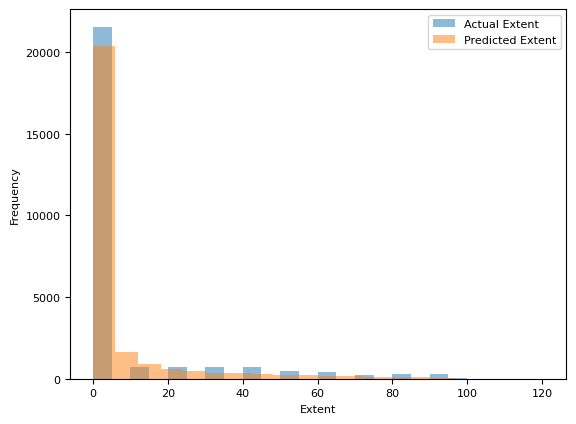

In [7]:
# Histogram
plt.hist(df['extent'], bins=20, alpha=0.5, label='Actual Extent')
plt.hist(df['predicted_extent'], bins=20, alpha=0.5, label='Predicted Extent')
plt.xlabel('Extent')
plt.ylabel('Frequency')
plt.legend()
plt.show()

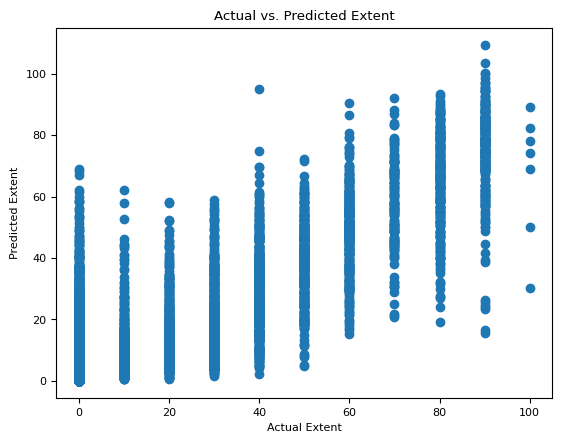

In [8]:
# Scatter Plot
plt.scatter(df[df['growth_stage'] == 'M']['extent'], df[df['growth_stage'] == 'M']['predicted_extent'])
plt.xlabel('Actual Extent')
plt.ylabel('Predicted Extent')
plt.title('Actual vs. Predicted Extent')
plt.show()

In [9]:
df.columns

Index(['ID', 'filename', 'growth_stage', 'extent', 'season',
       'predicted_extent'],
      dtype='object')

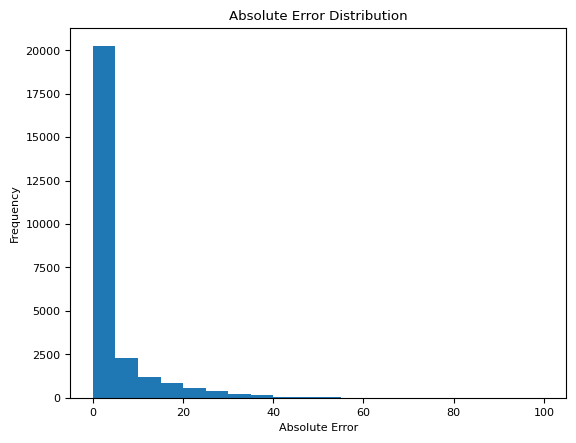

In [10]:
# Calculate absolute error
df['abs_error'] = abs(df['extent'] - df['predicted_extent'])

# Visualize error distribution
plt.hist(df['abs_error'], bins=20)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Absolute Error Distribution')
plt.show()



ID                         filename  extent  \
3257   ID_7FW208V5E5   L406F00126C39S12385Rp33641.jpg     100   
5241   ID_0P4D9DM77H        L406F00126C39S12385Ip.jpg     100   
13404  ID_GG2JIWT6MQ   L428F02948C39S14228Dp49341.jpg     100   
15097  ID_S02NBETLXV   L406F00126C39S12385Rp36326.jpg     100   
17896  ID_GCCVFWSARV        L376F03238C39S12182Ip.jpg       0   
5248   ID_JWPQDQ5VVS   L426F01825C41S14977Rp47742.jpg      90   
7399   ID_IJBAIHEOOO   L435F01432C02S07913Rp26702.jpg      80   
25478  ID_LDEKVUPJEW  L1093F00014C01S07397Rp26729.jpg      90   
13220  ID_EVUUZQKSS4   L231F01717C40S14543Rp46282.jpg     100   
4733   ID_MN0GJ8QZPG   L133F00713C39S14619Rp44974.jpg      90   
25769  ID_JSH9RZ0MIL  L1130F00057C01S08015Rp28965.jpg      90   
17878  ID_AYE300EJ8S   L376F04688C39S12379Rp47008.jpg      70   
6085   ID_EF0N63ICLA   L242F01471C41S14075Rp48528.jpg     100   
12736  ID_JLJ0AHR3BE   L373F01910C42S14562Rp47601.jpg       0   
24912  ID_ICZ8TLYCYM   L361F01181C39S12760Rp49188.jpg       0   
10446  ID_NDUVDUTDGX   L134F00823C01S09779Rp29230.jpg      80   
18850  ID_2P2LXJIXVM   L398F01012C01S07268Rp31455.jpg       0   
17087  ID_ABXBSZ5Q9E   L141F01356C01S03839Rp13791.jpg       0   
9808   ID_IFXR7L6N7J   L992F04355C39S14824Rp40700.jpg      90   
25524  ID_RL5E45O7M2  L1150F03569C01S10095Rp26743.jpg      90   

       predicted_extent   abs_error  
3257           0.000000  100.000000  
5241           0.000000  100.000000  
13404          0.000000  100.000000  
15097          0.000000  100.000000  
17896         93.091255   93.091255  
5248           4.596737   85.403263  
7399           0.000000   80.000000  
25478         12.215729   77.784271  
13220         25.337584   74.662416  
4733          15.496074   74.503926  
25769         16.420340   73.579660  
17878          0.000000   70.000000  
6085          30.227686   69.772314  
12736         69.454117   69.454117  
24912         68.999657   68.999657  
10446         11.783974   68.216026  
18850         68.177567   68.177567  
17087         66.934799   66.934799  
9808          23.122772   66.877228  
25524         23.460102   66.539898

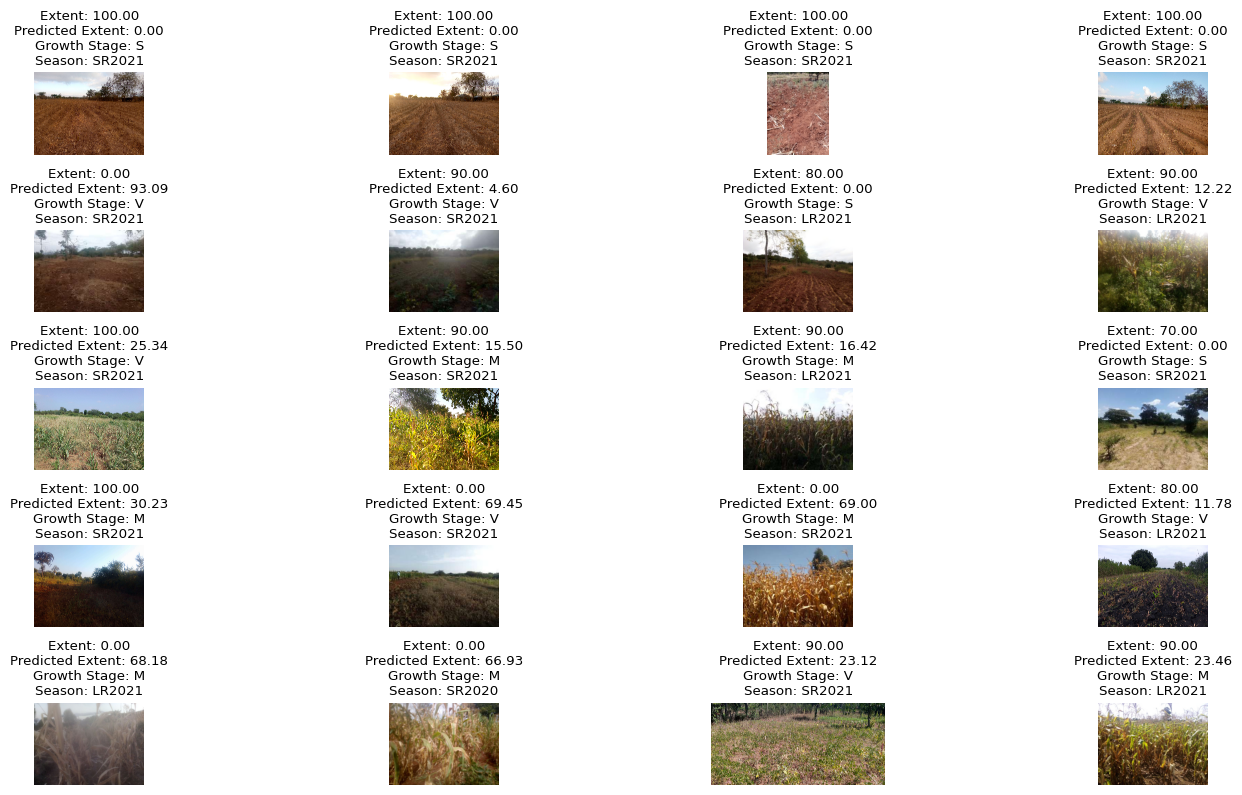

In [11]:
# Display cases with highest errors
num_top_errors = 20
top_error_cases = df.nlargest(num_top_errors, 'abs_error')
display(top_error_cases[['ID', 'filename', 'extent', 'predicted_extent', 'abs_error']])

# Create subplots
fig, axes = plt.subplots(num_top_errors // 4, 4, figsize=(15, 8))
axes = axes.ravel()

i = 0

filenames = []

for _, row in top_error_cases.iterrows():
    img_id = row['ID']
    extent = row['extent']
    filenames.append(row['filename'])
    growth_stage = row['growth_stage']
    season = row['season']
    
    predicted_extent = row['predicted_extent']
    
    # Load and display the image
    img = load_image(img_id)
    
    # Display the image with title containing extent and predicted extent
    axes[i].imshow(img)
    axes[i].set_title(f'Extent: {extent:.2f}\nPredicted Extent: {predicted_extent:.2f}\nGrowth Stage: {growth_stage}\nSeason: {season}')
    axes[i].axis('off')
  
    i += 1

# Adjust subplot layout
plt.tight_layout()
plt.show()

ID                         filename  extent  \
2546   ID_NAMA16UEVE   L373F01910C42S14562Rp49142.jpg     100   
5248   ID_JWPQDQ5VVS   L426F01825C41S14977Rp47742.jpg      90   
962    ID_HBM4U3PMW8   L428F02948C39S14228Dp49337.jpg     100   
9808   ID_IFXR7L6N7J   L992F04355C39S14824Rp40700.jpg      90   
3650   ID_15FRM8WAX3  L1116F03444C39S12544Rp38215.jpg      70   
16154  ID_NPJW8YX01K   L426F01041C41S14971Rp47754.jpg     100   
9928   ID_B4DY53PJ6O   L428F01217C39S14435Rp48288.jpg      90   
24786  ID_FNFQ4N1ANG   L133F02739C39S14305Rp46795.jpg     100   
5572   ID_U36F5CFLYD   L354F03937C39S13325Rp34676.jpg      50   
21064  ID_UFBVWWRA2N  L1155F04249C01S07812Rp20003.jpg      50   
7255   ID_TSLXXU48OZ   L134F00843C01S09765Rp27551.jpg      80   
12104  ID_B6V1G967JU   L415F02316C39S14816Dp47550.jpg      80   
15973  ID_GPJLO9T2KV   L243F04636C02S06787Rp20735.jpg      50   
10406  ID_F44U95FQOW   L315F00648C39S13356Rp49329.jpg      70   
1362   ID_QCSIUK6TCN  L1116F01834C39S12534Rp41850.jpg      80   
25236  ID_MXNXUR6LQA  L1116F03444C39S12544Rp42178.jpg      60   
24714  ID_NHDU0UO227   L428F02404C02S10338Rp24814.jpg      50   
25478  ID_LDEKVUPJEW  L1093F00014C01S07397Rp26729.jpg      90   
14434  ID_R5W75POFKQ   L428F03357C39S14368Rp49214.jpg     100   
14272  ID_0VR6BBQCG7   L436F02302C39S14364Dp48602.jpg     100   

       predicted_extent  abs_error  
2546          15.510284  84.489716  
5248          15.653403  74.346597  
962           39.219212  60.780788  
9808          30.024830  59.975170  
3650          13.781234  56.218766  
16154         48.058071  51.941929  
9928          39.198723  50.801277  
24786         49.401363  50.598637  
5572           2.080144  47.919856  
21064          2.088903  47.911097  
7255          32.282856  47.717144  
12104         33.251484  46.748516  
15973          4.011740  45.988260  
10406         24.867613  45.132387  
1362          36.155514  43.844486  
25236         16.318233  43.681767  
24714          6.658075  43.341925  
25478         47.703728  42.296272  
14434         58.007790  41.992210  
14272         58.695972  41.304028

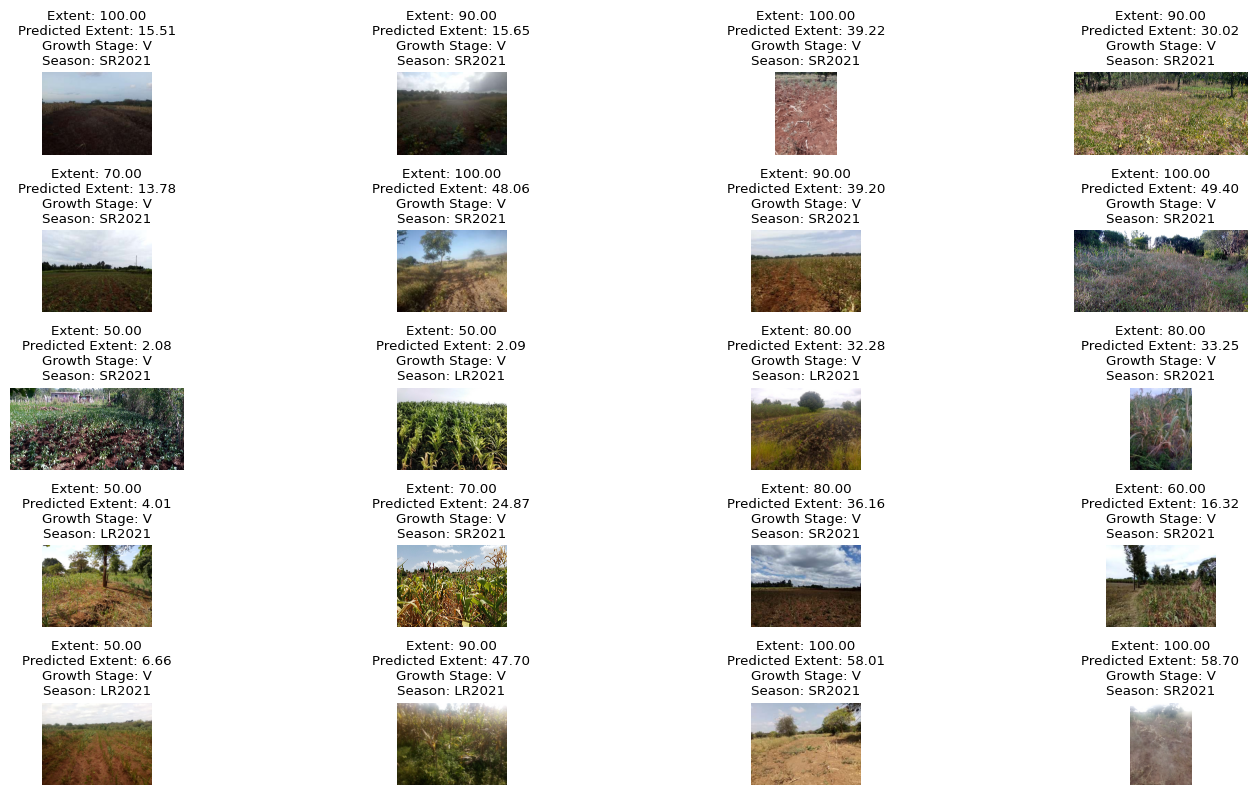

In [11]:
# Display cases with highest errors
num_top_errors_growth_stage = 20
top_error_cases = df[df['growth_stage'] == 'V'].nlargest(num_top_errors, 'abs_error')
display(top_error_cases[['ID', 'filename', 'extent', 'predicted_extent', 'abs_error']])

# Create subplots
fig, axes = plt.subplots(num_top_errors // 4, 4, figsize=(15, 8))
axes = axes.ravel()

filenames = []

i = 0
for _, row in top_error_cases.iterrows():
    img_id = row['ID']
    extent = row['extent']
    filenames.append(row['filename'])
    growth_stage = row['growth_stage']
    season = row['season']
    
    predicted_extent = row['predicted_extent']
    
    # Load and display the image
    img = load_image(img_id)
    
    # Display the image with title containing extent and predicted extent
    axes[i].imshow(img)
    axes[i].set_title(f'Extent: {extent:.2f}\nPredicted Extent: {predicted_extent:.2f}\nGrowth Stage: {growth_stage}\nSeason: {season}')
    axes[i].axis('off')
  
    i += 1

# Adjust subplot layout
plt.tight_layout()
plt.show()

ID                         filename  extent  \
1890   ID_76WMJK7BGE   L354F00182C39S14682Rp47725.jpg      80   
23743  ID_38RODYIG1X  L1124F01277C01S06750Rp32203.jpg      90   
24892  ID_KBBX924931  L1122F02550C39S14372Rp40319.jpg      80   
12867  ID_OVELU1IMNS   L133F03014C39S14530Rp46796.jpg     100   
17854  ID_89H8ST3QHJ  L1132F04287C01S07495Rp29811.jpg      80   
5336   ID_HRWZR4XAQ9   L131F03895C01S07353Rp22643.jpg      60   
19632  ID_TJJY66YRNI   L428F02948C39S14228Rp48510.jpg      90   
16247  ID_SUZYH0O4RR  L1125F00286C01S06790Rp29302.jpg      90   
15233  ID_AKASSPZS1U   L435F01653C01S09292Rp30037.jpg      90   
5690   ID_F5LMDXZEAI   L133F00087C39S14336Rp46206.jpg      90   
13724  ID_IB1HK5S180   L376F02419C42S14392Rp47925.jpg      90   
15767  ID_HORI4VY5CF   L354F03986C39S13313Rp46810.jpg      80   
1539   ID_WNMM15KWK0   L322F03027C01S09332Rp26288.jpg      50   
15135  ID_JXE3Z1L81T   L435F01432C39S14949Rp48469.jpg     100   
5177   ID_0FLZ45A6R9   L398F02597C01S10287Rp31697.jpg      70   
10467  ID_0JD26ME5S5   L134F00823C39S14202Rp47695.jpg      80   
17463  ID_FC1HO1ZTMJ   L133F00979C01S07887Rp23759.jpg      50   
13959  ID_LQB03ZVBV0   L426F02817C39S14970Rp47753.jpg      90   
10407  ID_WAI3Z9QO5Z  L1095F00653C39S13988Dp38319.jpg      70   
14202  ID_A4KOM9GXZX   L133F01736C01S00301Rp10023.jpg      50   

       predicted_extent  abs_error  
1890          23.108038  56.891962  
23743         33.378605  56.621395  
24892         23.756104  56.243896  
12867         44.514011  55.485989  
17854         25.723038  54.276962  
5336           7.744461  52.255539  
19632         39.293964  50.706036  
16247         40.559769  49.440231  
15233         40.689281  49.310719  
5690          41.019268  48.980732  
13724         41.096146  48.903854  
15767         32.991188  47.008812  
1539           4.604283  45.395717  
15135         55.165188  44.834812  
5177          25.945902  44.054098  
10467         36.252865  43.747135  
17463          6.446665  43.553335  
13959         47.494900  42.505100  
10407         27.806860  42.193140  
14202          8.915268  41.084732

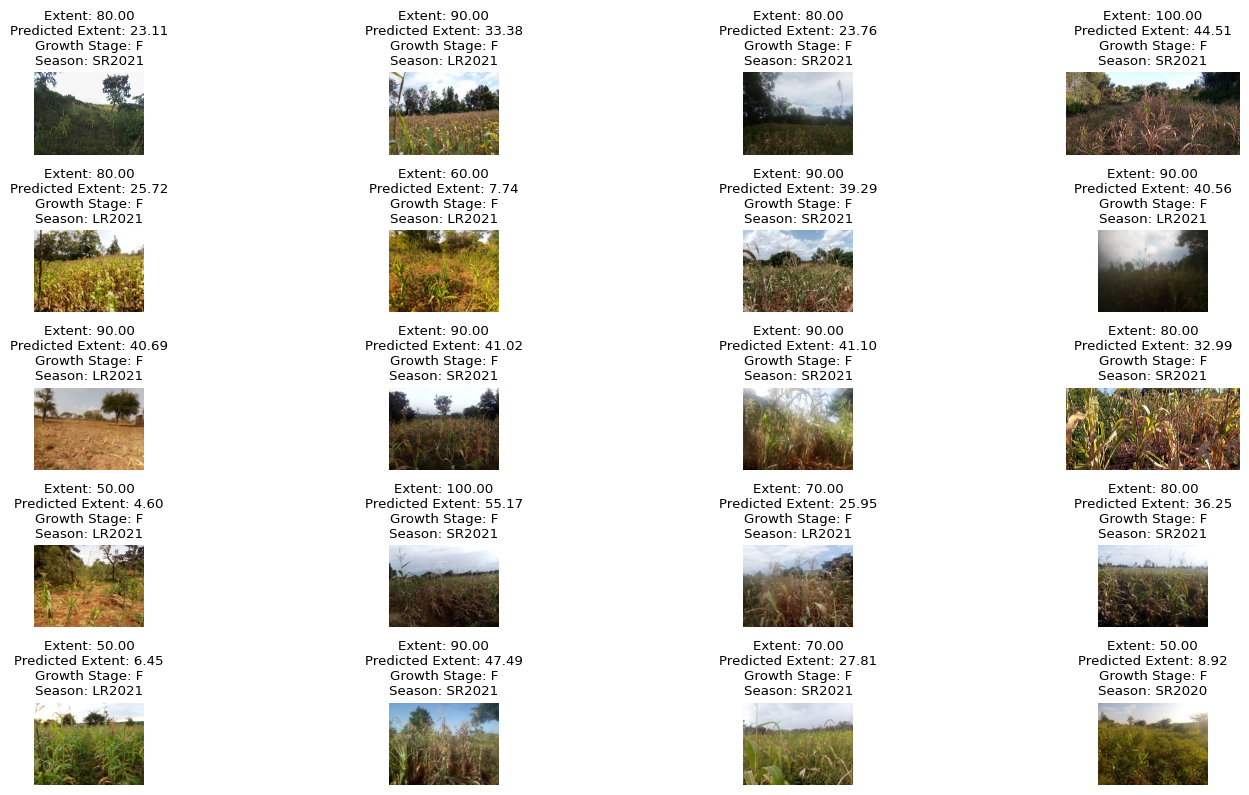

In [12]:
# Display cases with highest errors
num_top_errors_growth_stage = 20
top_error_cases = df[df['growth_stage'] == 'F'].nlargest(num_top_errors, 'abs_error')
display(top_error_cases[['ID', 'filename', 'extent', 'predicted_extent', 'abs_error']])

# Create subplots
fig, axes = plt.subplots(num_top_errors // 4, 4, figsize=(15, 8))
axes = axes.ravel()

filenames = []

i = 0
for _, row in top_error_cases.iterrows():
    img_id = row['ID']
    extent = row['extent']
    filenames.append(row['filename'])
    growth_stage = row['growth_stage']
    season = row['season']
    
    predicted_extent = row['predicted_extent']
    
    # Load and display the image
    img = load_image(img_id)
    
    # Display the image with title containing extent and predicted extent
    axes[i].imshow(img)
    axes[i].set_title(f'Extent: {extent:.2f}\nPredicted Extent: {predicted_extent:.2f}\nGrowth Stage: {growth_stage}\nSeason: {season}')
    axes[i].axis('off')
  
    i += 1

# Adjust subplot layout
plt.tight_layout()
plt.show()

ID                         filename  extent  \
13353  ID_EXY9Y51FPH   L428F02700C41S12411Rp49377.jpg      90   
16479  ID_R6B21WIA1F   L361F02341C01S03420Rp13110.jpg      90   
4733   ID_MN0GJ8QZPG   L133F00713C39S14619Rp44974.jpg      90   
5062   ID_0Y1PRKV84V   L341F01441C01S01014Rp11564.jpg      80   
20873  ID_LSU7PK5M7N   L134F00771C39S14838Rp48532.jpg      90   
3898   ID_K7EZNRZUCL   L134F00756C01S05348Rp14115.jpg       0   
594    ID_3BKYW4O1EY  L1116F03113C39S12541Rp41836.jpg      80   
6085   ID_EF0N63ICLA   L242F01471C41S14075Rp48528.jpg     100   
6665   ID_1TDMRIADJM  229_repeat_2_2062_6415_4781.JPG       0   
5020   ID_5HIFNG8Y36   L222F00385C39S14643Rp47862.jpg     100   
14481  ID_S7D88CRAOZ   L141F01211C01S00245Rp14736.jpg      90   
3089   ID_6FLDM8OT3I   L124F03423C01S01216Rp13628.jpg      80   
19928  ID_JDBD1WBS6B   L355F02278C01S05301Rp13396.jpg       0   
16491  ID_ROU5SORK17   L124F01890C01S00858Rp14313.jpg      80   
10518  ID_UMJZ2P5TG1   L131F00084C39S12595Rp48295.jpg      50   
3050   ID_XBRTIZX16A   L361F02344C39S14061Rp48579.jpg      80   
15398  ID_5QLBY3H5KO   L231F01273C03S08942Rp24200.jpg      50   
14300  ID_X6OE7UBW05   L221F00396C01S03309Rp14301.jpg      90   
10572  ID_JWWYACKUUP   L323F03352C42S14654Rp46939.jpg      50   
17289  ID_4HF7KVJ76C  L1094F00681C01S00711Rp06491.jpg      80   

       predicted_extent  abs_error  
13353          0.573149  89.426851  
16479         25.706181  64.293819  
4733          29.184540  60.815460  
5062          22.042822  57.957178  
20873         32.774967  57.225033  
3898          56.496185  56.496185  
594           23.645632  56.354368  
6085          44.542805  55.457195  
6665          55.350471  55.350471  
5020          45.398903  54.601097  
14481         35.549633  54.450367  
3089          25.797544  54.202456  
19928         52.921394  52.921394  
16491         29.694334  50.305666  
10518          0.101458  49.898542  
3050          30.504011  49.495989  
15398          0.516411  49.483589  
14300         40.913689  49.086311  
10572          1.137791  48.862209  
17289         31.579712  48.420288

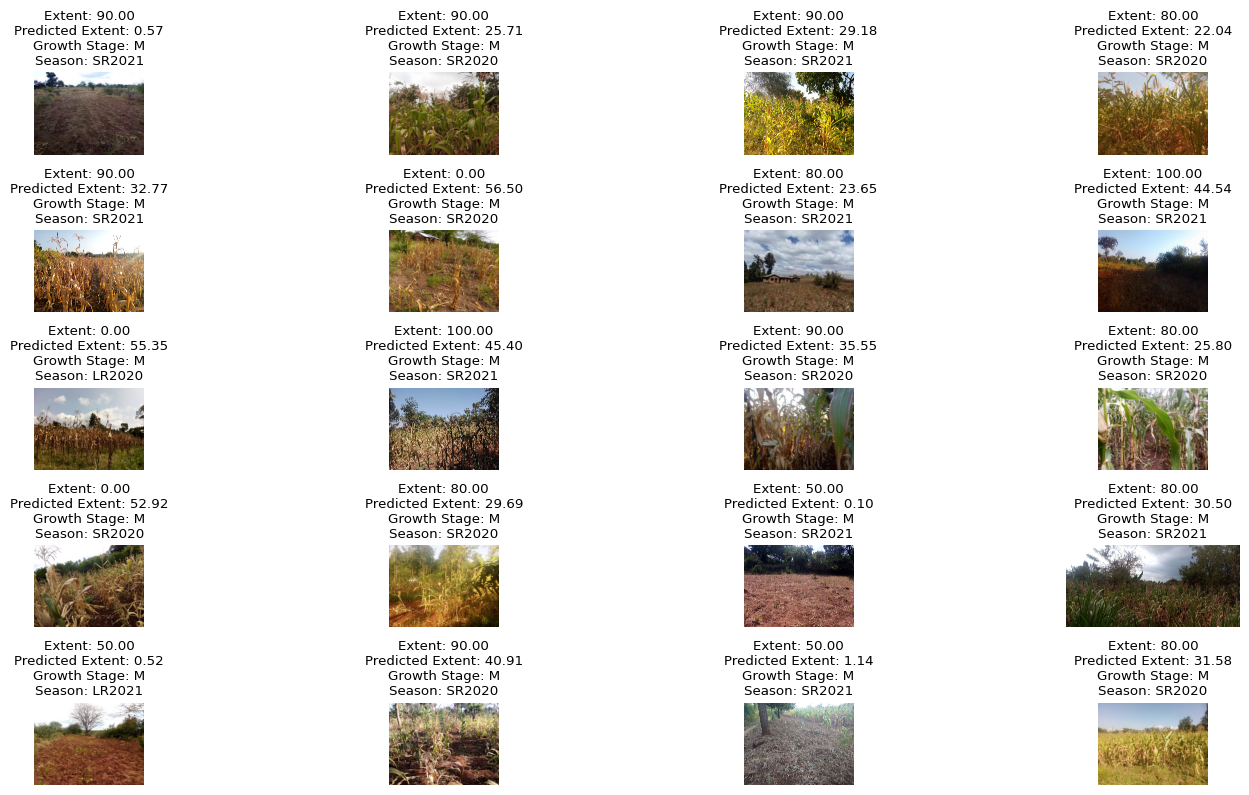

In [13]:
# Display cases with highest errors
num_top_errors_growth_stage = 20
top_error_cases_M_stage = df[df['growth_stage'] == 'M'].nlargest(num_top_errors, 'abs_error')
display(top_error_cases_M_stage[['ID', 'filename', 'extent', 'predicted_extent', 'abs_error']])

# Create subplots
fig, axes = plt.subplots(num_top_errors // 4, 4, figsize=(15, 8))
axes = axes.ravel()

filenames = []

i = 0
for _, row in top_error_cases_M_stage.iterrows():
    img_id = row['ID']
    extent = row['extent']
    filenames.append(row['filename'])
    growth_stage = row['growth_stage']
    season = row['season']
    
    predicted_extent = row['predicted_extent']
    
    # Load and display the image
    img = load_image(img_id)
    
    # Display the image with title containing extent and predicted extent
    axes[i].imshow(img)
    axes[i].set_title(f'Extent: {extent:.2f}\nPredicted Extent: {predicted_extent:.2f}\nGrowth Stage: {growth_stage}\nSeason: {season}')
    axes[i].axis('off')
  
    i += 1

# Adjust subplot layout
plt.tight_layout()
plt.show()

In [14]:
top_error_cases_M_stage.values[12][0]

'ID_JDBD1WBS6B'

ID                         filename  extent  \
7399   ID_IJBAIHEOOO   L435F01432C02S07913Rp26702.jpg      80   
13404  ID_GG2JIWT6MQ   L428F02948C39S14228Dp49341.jpg     100   
3257   ID_7FW208V5E5   L406F00126C39S12385Rp33641.jpg     100   
15097  ID_S02NBETLXV   L406F00126C39S12385Rp36326.jpg     100   
5241   ID_0P4D9DM77H        L406F00126C39S12385Ip.jpg     100   
16724  ID_R9VRBKZ7A5   L376F00304C39S12293Dp35205.jpg      50   
13822  ID_PIGE52O9GI        L144F00100C39S12234Ip.jpg      40   
17878  ID_AYE300EJ8S   L376F04688C39S12379Rp47008.jpg      70   
8004   ID_8EHT301IQP   L376F00304C39S12293Dp35206.jpg      40   
16103  ID_S2ABDBASUZ   L231F03442C03S08759Rp30267.jpg      30   
25975  ID_Y1VM5NAQYG   L125F01661C03S08872Rp24220.jpg      30   
17221  ID_BCUL2JURJA   L331F04121C01S03780Rp13356.jpg      30   
21209  ID_VUBQGAI0RV  L1153F00556C39S12371Rp34651.jpg      20   
21778  ID_8RXQMCBC2E   L144F00937C39S12240Rp35720.jpg       0   
9452   ID_WKLPW33FAV   L144F00936C39S12239Rp35718.jpg       0   
3297   ID_4P9GICWCCP       L1153F00556C39S12371Ip.jpg      20   
14132  ID_UQWT12TLUW   L134F00761C01S07218Rp22364.jpg      20   
12075  ID_2IDNNX20PF        L141F01026C39S12520Ip.jpg       0   
18507  ID_C044MUJNEW   L415F00897C01S09399Rp31706.jpg       0   
8524   ID_P9ZNA8HR18        L354F03918C39S14696Ip.jpg       0   

       predicted_extent  abs_error  
7399           0.360621  79.639379  
13404         30.130686  69.869314  
3257          31.824345  68.175655  
15097         34.442341  65.557659  
5241          44.318520  55.681480  
16724          4.946231  45.053769  
13822          1.415582  38.584418  
17878         32.922466  37.077534  
8004           5.249149  34.750851  
16103          1.599571  28.400429  
25975          4.651162  25.348838  
17221         51.191601  21.191601  
21209          0.745248  19.254752  
21778         17.277063  17.277063  
9452          17.064253  17.064253  
3297           3.258768  16.741232  
14132          3.962885  16.037115  
12075         14.799838  14.799838  
18507         14.287763  14.287763  
8524          13.998481  13.998481

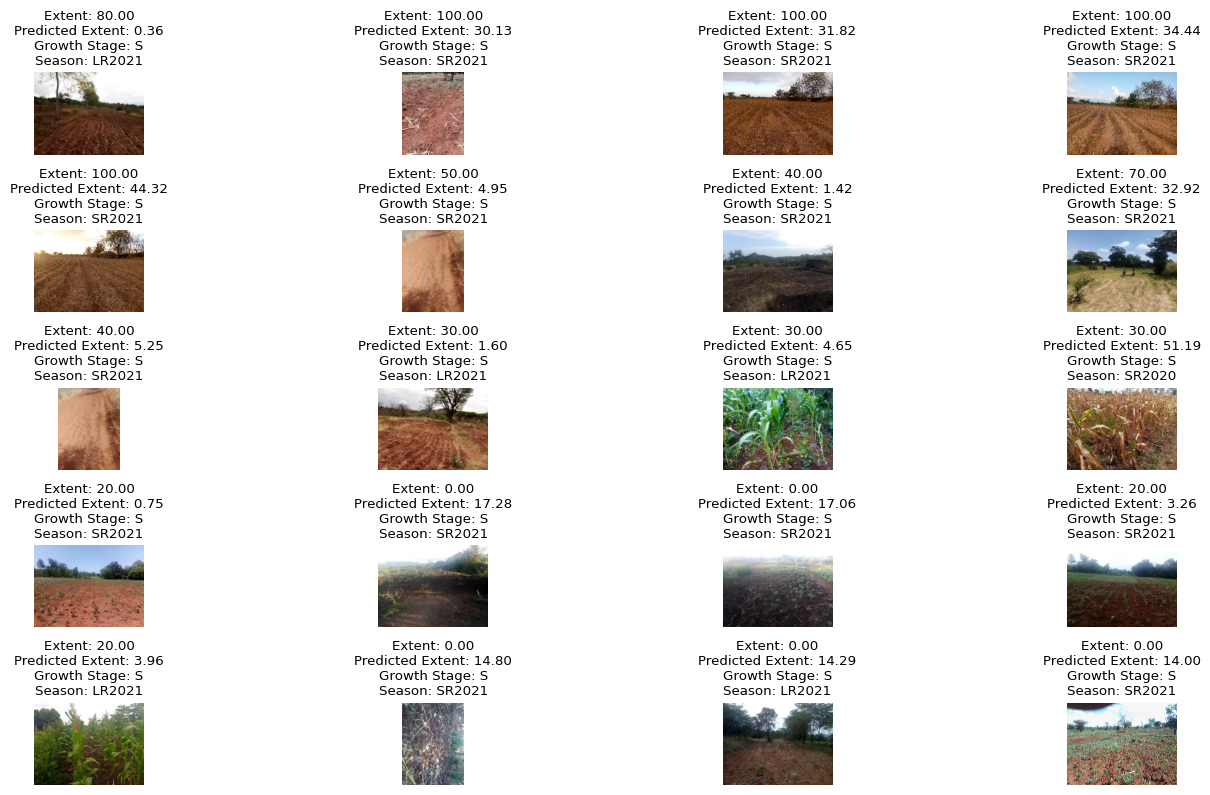

In [15]:
# Display cases with highest errors
num_top_errors_growth_stage = 20
top_error_cases = df[df['growth_stage'] == 'S'].nlargest(num_top_errors, 'abs_error')
display(top_error_cases[['ID', 'filename', 'extent', 'predicted_extent', 'abs_error']])

# Create subplots
fig, axes = plt.subplots(num_top_errors // 4, 4, figsize=(15, 8))
axes = axes.ravel()

filenames = []

i = 0
for _, row in top_error_cases.iterrows():
    img_id = row['ID']
    extent = row['extent']
    filenames.append(row['filename'])
    growth_stage = row['growth_stage']
    season = row['season']
    
    predicted_extent = row['predicted_extent']
    
    # Load and display the image
    img = load_image(img_id)
    
    # Display the image with title containing extent and predicted extent
    axes[i].imshow(img)
    axes[i].set_title(f'Extent: {extent:.2f}\nPredicted Extent: {predicted_extent:.2f}\nGrowth Stage: {growth_stage}\nSeason: {season}')
    axes[i].axis('off')
  
    i += 1

# Adjust subplot layout
plt.tight_layout()
plt.show()

In [16]:
# Calculate Pearson's correlation coefficient
correlation_coefficient = df['extent'].corr(df['predicted_extent'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.9012701818574372


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df['extent'], df['predicted_extent'])
mse = mean_squared_error(df['extent'], df['predicted_extent'])
rmse = mean_squared_error(df['extent'], df['predicted_extent'], squared=False)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 4.048293002965905
MSE: 71.51654634247754
RMSE: 8.456745611786932


In [18]:
df['error'] = abs(df['extent'] - df['predicted_extent'])
error_by_growth_stage = df.groupby('growth_stage')['error'].mean().reset_index()
display(error_by_growth_stage)

growth_stage     error
0            F  3.822852
1            M  9.832702
2            S  1.149352
3            V  1.271599

In [19]:
error_by_growth_stage = df.groupby('season')['error'].mean().reset_index()
display(error_by_growth_stage)

season     error
0  LR2020  4.413538
1  LR2021  3.929671
2  SR2020  4.497317
3  SR2021  3.789662

In [20]:
# load the trained model timm model from the artifacts folder
import torch
import timm
from torch import nn
from torch.nn import functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = nn.Sequential(
    timm.create_model("xcit_tiny_12_p16_224", pretrained=True),
    nn.Linear(1000, 512),
    nn.ReLU(),
    nn.Linear(512, 1),
    nn.ReLU()
)
model.load_state_dict(torch.load(artifacts / 'model.pt'))
model = model.to(device)
model.eval()

Sequential(
  (0): Xcit(
    (patch_embed): ConvPatchEmbed(
      (proj): Sequential(
        (0): Sequential(
          (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): GELU(approximate='none')
        (2): Sequential(
          (0): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (3): GELU(approximate='none')
        (4): Sequential(
          (0): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (5): GELU(approximate='none')
        (6): Sequential(
          (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1)

In [21]:
img = load_image("ID_EXY9Y51FPH")

In [22]:
from torchvision import transforms
from cgiar.data import CGIARDataset_V2, augmentations

IMAGE_SIZE=224


transform = transforms.Compose([
    transforms.RandomResizedCrop(IMAGE_SIZE),
    augmentations["RandomEqualize"],
    augmentations["RandomAffine"],
    augmentations["RandomErasing"],
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [23]:
# remove the last two layers of the model
model = nn.Sequential(*list(model.children())[:-2])

In [24]:
rep1 = model(transform(img).unsqueeze(0).to(device)).shape

In [25]:
from tqdm.notebook import  tqdm

def get_all_features(num_views=20):
    features = []
    
    with torch.no_grad():
        for _, row in tqdm(df.iterrows(), total=len(df)):
            img_id = row['ID']
            img = load_image(img_id)
            imgs = torch.stack([transform(img) for _ in range(num_views)], dim=0).to(device)
            rep = model(imgs).mean(dim=0)
            rep = rep
            features.append(rep.cpu().tolist())
    return features

In [26]:
feats = get_all_features(num_views=1)

  0%|          | 0/26068 [00:00<?, ?it/s]

In [27]:
df['features'] = feats

In [28]:
def get_top_k_closest_images(img_id, k=5, growth_stage = None):
    
    with torch.no_grad():
        # get the features from the id
        rep1 = torch.tensor(df[df['ID'] == img_id]['features'].values[0])
        
        # loop through every image and get the distance between the image and the input image
        distances = []
        idx_s = []
        
        
        df_int = df
        
        if growth_stage is not None:
            df_int = df_int[df_int["growth_stage"] == growth_stage]
        # df_int = df
        for idx, row in tqdm(df_int.iterrows(), total=len(df_int)):
            rep2 = torch.tensor(row['features'])
            
            # use kl divergence to calculate the distance between the two images
            # distance = F.kl_div((rep1 + 1e-32).log(), rep2 + 1e-32, reduction='batchmean').item()
            distance = F.mse_loss(rep1, rep2).item()
            distances.append(distance)
            idx_s.append(idx)
            
        # sort the distances and get the top k images
        top_k = np.argsort(distances)[:k]
        
        
    
        # Create subplots
        fig, axes = plt.subplots(len(top_k) // 4, 4, figsize=(15, 8))
        axes = axes.ravel()
        a = 0
        
        # print the top k images
        for i in top_k:
            idx = idx_s[i]
            img_id = df.iloc[idx]['ID']
            img = load_image(img_id)
            extent = df.iloc[idx]['extent']
            predicted_extent = df.iloc[idx]['predicted_extent']
            growth_stage = df.iloc[idx]['growth_stage']
            season = df.iloc[idx]['season']
            
            # Display the image with title containing extent and predicted extent
            axes[a].imshow(img)
            axes[a].set_title(f'Extent: {extent:.2f}\nPredicted Extent: {predicted_extent:.2f}\nGrowth Stage: {growth_stage}\nSeason: {season}\nDistance: {distances[i]:.5f}')
            axes[a].axis('off')
        
            a += 1
            
        # Adjust subplot layout
        plt.tight_layout()
        plt.show()

['V' 100 15.510284423828123]


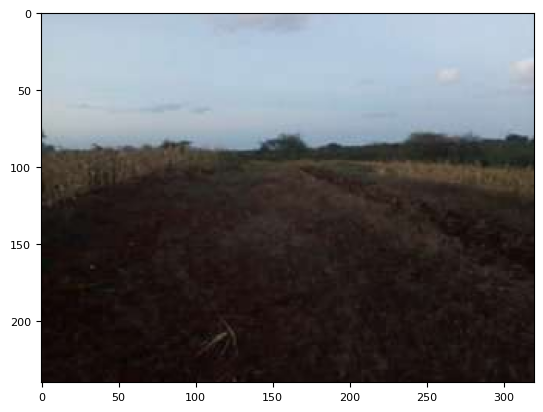

In [29]:
img_id="ID_NAMA16UEVE"

plt.imshow(load_image(img_id))
print(df[df['ID'] == img_id][['growth_stage', 'extent', 'predicted_extent']].values[0])

  0%|          | 0/26068 [00:00<?, ?it/s]

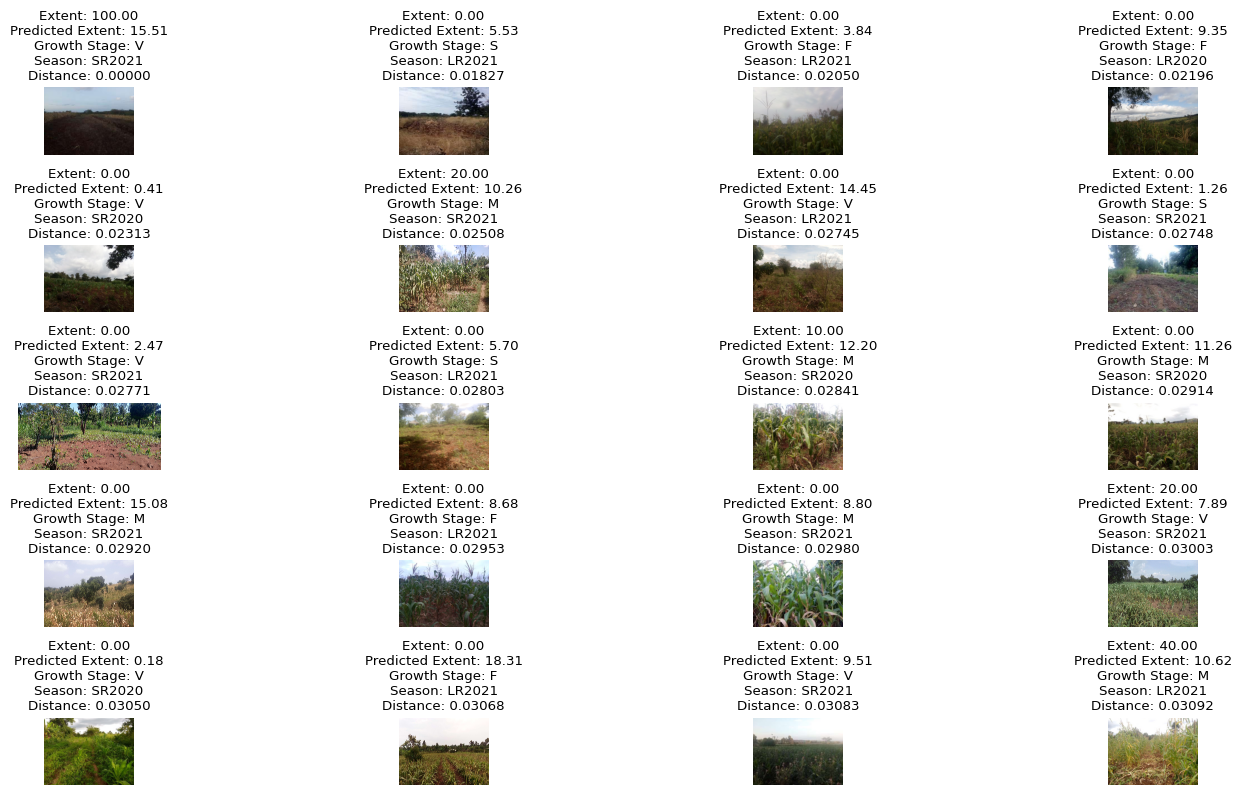

In [30]:
get_top_k_closest_images(img_id, k=20)

Interesting viz

- ID_EXY9Y51FPH: goot according to S stage but it is in fact M stage and therefore bad
- ID_NAMA16UEVE, ID_JWPQDQ5VVS